In [1]:
import pandas as pd
import numpy as np
import urllib
import os
import warnings
import sqlalchemy

# مكتبات الرسم البياني (Visualization)
import matplotlib.pyplot as plt
import seaborn as sns

# لإخفاء تحذيرات Pandas أو غيرها
warnings.filterwarnings("ignore")

In [2]:
# --- 1. الإعدادات / Configuration ---
server = 'youssefkhalid'
database = 'INSTANT22'
CHUNK_SIZE = 10000 
OUTPUT_FILE = 'fully_joined_transactions_data.csv' 

# --- 2. إنشاء محرك SQLAlchemy للاتصال ---
params = urllib.parse.quote_plus(
    f'DRIVER={{ODBC Driver 17 for SQL Server}};SERVER={server};DATABASE={database};Trusted_Connection=yes;'
)
try:
    engine = sqlalchemy.create_engine(f"mssql+pyodbc:///?odbc_connect={params}")
except Exception as e:
    print(f"❌ خطأ في إنشاء محرك الاتصال: {e}")
    # إذا فشل الاتصال هنا، لا يمكن متابعة الكود

# --- 3. استعلام SQL المدمج (الـ JOIN) ---
query = """
SELECT
    t.*,
    u.per_capita_income,  
    u.yearly_income,
    u.credit_score,
    c.card_brand,
    c.card_type
FROM
    transactions AS t
LEFT JOIN
    UsersData AS u ON t.client_id = u.id
LEFT JOIN
    CardsData AS c ON t.card_id = c.id;
"""

# --- 4. جلب وحفظ البيانات مباشرةً في أجزاء ---
total_rows = 0
first_chunk = True

print(f"✅ تم إنشاء محرك الاتصال. بدء جلب وحفظ البيانات إلى {OUTPUT_FILE}...")

try:
    # استخدام engine و chunksize لتدفق البيانات بشكل فعال ومباشر
    for i, chunk in enumerate(pd.read_sql(query, engine, chunksize=CHUNK_SIZE)):
        
        # الحفظ المباشر على القرص لتجنب نفاد الذاكرة
        mode = 'w' if first_chunk else 'a' # 'w' للكتابة، 'a' للإضافة
        header = first_chunk # كتابة الـ Header في الجزء الأول فقط
        
        chunk.to_csv(OUTPUT_FILE, index=False, mode=mode, header=header, encoding='utf-8')
            
        first_chunk = False 
        total_rows += len(chunk)
        print(f"   ▶️ تم جلب وحفظ الجزء رقم {i+1}. عدد الصفوف الحالي الإجمالي: {total_rows}")

    print("\n" + "="*70)
    print(f"🎉 اكتمل التحميل! تم حفظ إجمالي {total_rows} صفًا مدمجًا بنجاح في الملف {OUTPUT_FILE}.")
    print("الآن يمكن بدء التحليل.")
    print("="*70)

except Exception as e:
    print(f"\n❌ حدث خطأ أثناء جلب البيانات: {e}")

finally:
    if 'engine' in locals() and engine:
        engine.dispose()

✅ تم إنشاء محرك الاتصال. بدء جلب وحفظ البيانات إلى fully_joined_transactions_data.csv...
   ▶️ تم جلب وحفظ الجزء رقم 1. عدد الصفوف الحالي الإجمالي: 10000
   ▶️ تم جلب وحفظ الجزء رقم 2. عدد الصفوف الحالي الإجمالي: 20000
   ▶️ تم جلب وحفظ الجزء رقم 3. عدد الصفوف الحالي الإجمالي: 30000
   ▶️ تم جلب وحفظ الجزء رقم 4. عدد الصفوف الحالي الإجمالي: 40000
   ▶️ تم جلب وحفظ الجزء رقم 5. عدد الصفوف الحالي الإجمالي: 50000
   ▶️ تم جلب وحفظ الجزء رقم 6. عدد الصفوف الحالي الإجمالي: 60000
   ▶️ تم جلب وحفظ الجزء رقم 7. عدد الصفوف الحالي الإجمالي: 70000
   ▶️ تم جلب وحفظ الجزء رقم 8. عدد الصفوف الحالي الإجمالي: 80000
   ▶️ تم جلب وحفظ الجزء رقم 9. عدد الصفوف الحالي الإجمالي: 90000
   ▶️ تم جلب وحفظ الجزء رقم 10. عدد الصفوف الحالي الإجمالي: 100000
   ▶️ تم جلب وحفظ الجزء رقم 11. عدد الصفوف الحالي الإجمالي: 110000
   ▶️ تم جلب وحفظ الجزء رقم 12. عدد الصفوف الحالي الإجمالي: 120000
   ▶️ تم جلب وحفظ الجزء رقم 13. عدد الصفوف الحالي الإجمالي: 130000
   ▶️ تم جلب وحفظ الجزء رقم 14. عدد الصفوف الحالي الإجمالي

   ▶️ تم جلب وحفظ الجزء رقم 123. عدد الصفوف الحالي الإجمالي: 1230000
   ▶️ تم جلب وحفظ الجزء رقم 124. عدد الصفوف الحالي الإجمالي: 1240000
   ▶️ تم جلب وحفظ الجزء رقم 125. عدد الصفوف الحالي الإجمالي: 1250000
   ▶️ تم جلب وحفظ الجزء رقم 126. عدد الصفوف الحالي الإجمالي: 1260000
   ▶️ تم جلب وحفظ الجزء رقم 127. عدد الصفوف الحالي الإجمالي: 1270000
   ▶️ تم جلب وحفظ الجزء رقم 128. عدد الصفوف الحالي الإجمالي: 1280000
   ▶️ تم جلب وحفظ الجزء رقم 129. عدد الصفوف الحالي الإجمالي: 1290000
   ▶️ تم جلب وحفظ الجزء رقم 130. عدد الصفوف الحالي الإجمالي: 1300000
   ▶️ تم جلب وحفظ الجزء رقم 131. عدد الصفوف الحالي الإجمالي: 1310000
   ▶️ تم جلب وحفظ الجزء رقم 132. عدد الصفوف الحالي الإجمالي: 1320000
   ▶️ تم جلب وحفظ الجزء رقم 133. عدد الصفوف الحالي الإجمالي: 1330000
   ▶️ تم جلب وحفظ الجزء رقم 134. عدد الصفوف الحالي الإجمالي: 1340000
   ▶️ تم جلب وحفظ الجزء رقم 135. عدد الصفوف الحالي الإجمالي: 1350000
   ▶️ تم جلب وحفظ الجزء رقم 136. عدد الصفوف الحالي الإجمالي: 1360000
   ▶️ تم جلب وحفظ الجزء رقم 137. ع

   ▶️ تم جلب وحفظ الجزء رقم 242. عدد الصفوف الحالي الإجمالي: 2420000
   ▶️ تم جلب وحفظ الجزء رقم 243. عدد الصفوف الحالي الإجمالي: 2430000
   ▶️ تم جلب وحفظ الجزء رقم 244. عدد الصفوف الحالي الإجمالي: 2440000
   ▶️ تم جلب وحفظ الجزء رقم 245. عدد الصفوف الحالي الإجمالي: 2450000
   ▶️ تم جلب وحفظ الجزء رقم 246. عدد الصفوف الحالي الإجمالي: 2460000
   ▶️ تم جلب وحفظ الجزء رقم 247. عدد الصفوف الحالي الإجمالي: 2470000
   ▶️ تم جلب وحفظ الجزء رقم 248. عدد الصفوف الحالي الإجمالي: 2480000
   ▶️ تم جلب وحفظ الجزء رقم 249. عدد الصفوف الحالي الإجمالي: 2490000
   ▶️ تم جلب وحفظ الجزء رقم 250. عدد الصفوف الحالي الإجمالي: 2500000
   ▶️ تم جلب وحفظ الجزء رقم 251. عدد الصفوف الحالي الإجمالي: 2510000
   ▶️ تم جلب وحفظ الجزء رقم 252. عدد الصفوف الحالي الإجمالي: 2520000
   ▶️ تم جلب وحفظ الجزء رقم 253. عدد الصفوف الحالي الإجمالي: 2530000
   ▶️ تم جلب وحفظ الجزء رقم 254. عدد الصفوف الحالي الإجمالي: 2540000
   ▶️ تم جلب وحفظ الجزء رقم 255. عدد الصفوف الحالي الإجمالي: 2550000
   ▶️ تم جلب وحفظ الجزء رقم 256. ع

   ▶️ تم جلب وحفظ الجزء رقم 361. عدد الصفوف الحالي الإجمالي: 3610000
   ▶️ تم جلب وحفظ الجزء رقم 362. عدد الصفوف الحالي الإجمالي: 3620000
   ▶️ تم جلب وحفظ الجزء رقم 363. عدد الصفوف الحالي الإجمالي: 3630000
   ▶️ تم جلب وحفظ الجزء رقم 364. عدد الصفوف الحالي الإجمالي: 3640000
   ▶️ تم جلب وحفظ الجزء رقم 365. عدد الصفوف الحالي الإجمالي: 3650000
   ▶️ تم جلب وحفظ الجزء رقم 366. عدد الصفوف الحالي الإجمالي: 3660000
   ▶️ تم جلب وحفظ الجزء رقم 367. عدد الصفوف الحالي الإجمالي: 3670000
   ▶️ تم جلب وحفظ الجزء رقم 368. عدد الصفوف الحالي الإجمالي: 3680000
   ▶️ تم جلب وحفظ الجزء رقم 369. عدد الصفوف الحالي الإجمالي: 3690000
   ▶️ تم جلب وحفظ الجزء رقم 370. عدد الصفوف الحالي الإجمالي: 3700000
   ▶️ تم جلب وحفظ الجزء رقم 371. عدد الصفوف الحالي الإجمالي: 3710000
   ▶️ تم جلب وحفظ الجزء رقم 372. عدد الصفوف الحالي الإجمالي: 3720000
   ▶️ تم جلب وحفظ الجزء رقم 373. عدد الصفوف الحالي الإجمالي: 3730000
   ▶️ تم جلب وحفظ الجزء رقم 374. عدد الصفوف الحالي الإجمالي: 3740000
   ▶️ تم جلب وحفظ الجزء رقم 375. ع

   ▶️ تم جلب وحفظ الجزء رقم 480. عدد الصفوف الحالي الإجمالي: 4800000
   ▶️ تم جلب وحفظ الجزء رقم 481. عدد الصفوف الحالي الإجمالي: 4810000
   ▶️ تم جلب وحفظ الجزء رقم 482. عدد الصفوف الحالي الإجمالي: 4820000
   ▶️ تم جلب وحفظ الجزء رقم 483. عدد الصفوف الحالي الإجمالي: 4830000
   ▶️ تم جلب وحفظ الجزء رقم 484. عدد الصفوف الحالي الإجمالي: 4840000
   ▶️ تم جلب وحفظ الجزء رقم 485. عدد الصفوف الحالي الإجمالي: 4850000
   ▶️ تم جلب وحفظ الجزء رقم 486. عدد الصفوف الحالي الإجمالي: 4860000
   ▶️ تم جلب وحفظ الجزء رقم 487. عدد الصفوف الحالي الإجمالي: 4870000
   ▶️ تم جلب وحفظ الجزء رقم 488. عدد الصفوف الحالي الإجمالي: 4880000
   ▶️ تم جلب وحفظ الجزء رقم 489. عدد الصفوف الحالي الإجمالي: 4890000
   ▶️ تم جلب وحفظ الجزء رقم 490. عدد الصفوف الحالي الإجمالي: 4900000
   ▶️ تم جلب وحفظ الجزء رقم 491. عدد الصفوف الحالي الإجمالي: 4910000
   ▶️ تم جلب وحفظ الجزء رقم 492. عدد الصفوف الحالي الإجمالي: 4920000
   ▶️ تم جلب وحفظ الجزء رقم 493. عدد الصفوف الحالي الإجمالي: 4930000
   ▶️ تم جلب وحفظ الجزء رقم 494. ع

   ▶️ تم جلب وحفظ الجزء رقم 599. عدد الصفوف الحالي الإجمالي: 5990000
   ▶️ تم جلب وحفظ الجزء رقم 600. عدد الصفوف الحالي الإجمالي: 6000000
   ▶️ تم جلب وحفظ الجزء رقم 601. عدد الصفوف الحالي الإجمالي: 6010000
   ▶️ تم جلب وحفظ الجزء رقم 602. عدد الصفوف الحالي الإجمالي: 6020000
   ▶️ تم جلب وحفظ الجزء رقم 603. عدد الصفوف الحالي الإجمالي: 6030000
   ▶️ تم جلب وحفظ الجزء رقم 604. عدد الصفوف الحالي الإجمالي: 6040000
   ▶️ تم جلب وحفظ الجزء رقم 605. عدد الصفوف الحالي الإجمالي: 6050000
   ▶️ تم جلب وحفظ الجزء رقم 606. عدد الصفوف الحالي الإجمالي: 6060000
   ▶️ تم جلب وحفظ الجزء رقم 607. عدد الصفوف الحالي الإجمالي: 6070000
   ▶️ تم جلب وحفظ الجزء رقم 608. عدد الصفوف الحالي الإجمالي: 6080000
   ▶️ تم جلب وحفظ الجزء رقم 609. عدد الصفوف الحالي الإجمالي: 6090000
   ▶️ تم جلب وحفظ الجزء رقم 610. عدد الصفوف الحالي الإجمالي: 6100000
   ▶️ تم جلب وحفظ الجزء رقم 611. عدد الصفوف الحالي الإجمالي: 6110000
   ▶️ تم جلب وحفظ الجزء رقم 612. عدد الصفوف الحالي الإجمالي: 6120000
   ▶️ تم جلب وحفظ الجزء رقم 613. ع

   ▶️ تم جلب وحفظ الجزء رقم 718. عدد الصفوف الحالي الإجمالي: 7180000
   ▶️ تم جلب وحفظ الجزء رقم 719. عدد الصفوف الحالي الإجمالي: 7190000
   ▶️ تم جلب وحفظ الجزء رقم 720. عدد الصفوف الحالي الإجمالي: 7200000
   ▶️ تم جلب وحفظ الجزء رقم 721. عدد الصفوف الحالي الإجمالي: 7210000
   ▶️ تم جلب وحفظ الجزء رقم 722. عدد الصفوف الحالي الإجمالي: 7220000
   ▶️ تم جلب وحفظ الجزء رقم 723. عدد الصفوف الحالي الإجمالي: 7230000
   ▶️ تم جلب وحفظ الجزء رقم 724. عدد الصفوف الحالي الإجمالي: 7240000
   ▶️ تم جلب وحفظ الجزء رقم 725. عدد الصفوف الحالي الإجمالي: 7250000
   ▶️ تم جلب وحفظ الجزء رقم 726. عدد الصفوف الحالي الإجمالي: 7260000
   ▶️ تم جلب وحفظ الجزء رقم 727. عدد الصفوف الحالي الإجمالي: 7270000
   ▶️ تم جلب وحفظ الجزء رقم 728. عدد الصفوف الحالي الإجمالي: 7280000
   ▶️ تم جلب وحفظ الجزء رقم 729. عدد الصفوف الحالي الإجمالي: 7290000
   ▶️ تم جلب وحفظ الجزء رقم 730. عدد الصفوف الحالي الإجمالي: 7300000
   ▶️ تم جلب وحفظ الجزء رقم 731. عدد الصفوف الحالي الإجمالي: 7310000
   ▶️ تم جلب وحفظ الجزء رقم 732. ع

   ▶️ تم جلب وحفظ الجزء رقم 837. عدد الصفوف الحالي الإجمالي: 8370000
   ▶️ تم جلب وحفظ الجزء رقم 838. عدد الصفوف الحالي الإجمالي: 8380000
   ▶️ تم جلب وحفظ الجزء رقم 839. عدد الصفوف الحالي الإجمالي: 8390000
   ▶️ تم جلب وحفظ الجزء رقم 840. عدد الصفوف الحالي الإجمالي: 8400000
   ▶️ تم جلب وحفظ الجزء رقم 841. عدد الصفوف الحالي الإجمالي: 8410000
   ▶️ تم جلب وحفظ الجزء رقم 842. عدد الصفوف الحالي الإجمالي: 8420000
   ▶️ تم جلب وحفظ الجزء رقم 843. عدد الصفوف الحالي الإجمالي: 8430000
   ▶️ تم جلب وحفظ الجزء رقم 844. عدد الصفوف الحالي الإجمالي: 8440000
   ▶️ تم جلب وحفظ الجزء رقم 845. عدد الصفوف الحالي الإجمالي: 8450000
   ▶️ تم جلب وحفظ الجزء رقم 846. عدد الصفوف الحالي الإجمالي: 8460000
   ▶️ تم جلب وحفظ الجزء رقم 847. عدد الصفوف الحالي الإجمالي: 8470000
   ▶️ تم جلب وحفظ الجزء رقم 848. عدد الصفوف الحالي الإجمالي: 8480000
   ▶️ تم جلب وحفظ الجزء رقم 849. عدد الصفوف الحالي الإجمالي: 8490000
   ▶️ تم جلب وحفظ الجزء رقم 850. عدد الصفوف الحالي الإجمالي: 8500000
   ▶️ تم جلب وحفظ الجزء رقم 851. ع

   ▶️ تم جلب وحفظ الجزء رقم 956. عدد الصفوف الحالي الإجمالي: 9560000
   ▶️ تم جلب وحفظ الجزء رقم 957. عدد الصفوف الحالي الإجمالي: 9570000
   ▶️ تم جلب وحفظ الجزء رقم 958. عدد الصفوف الحالي الإجمالي: 9580000
   ▶️ تم جلب وحفظ الجزء رقم 959. عدد الصفوف الحالي الإجمالي: 9590000
   ▶️ تم جلب وحفظ الجزء رقم 960. عدد الصفوف الحالي الإجمالي: 9600000
   ▶️ تم جلب وحفظ الجزء رقم 961. عدد الصفوف الحالي الإجمالي: 9610000
   ▶️ تم جلب وحفظ الجزء رقم 962. عدد الصفوف الحالي الإجمالي: 9620000
   ▶️ تم جلب وحفظ الجزء رقم 963. عدد الصفوف الحالي الإجمالي: 9630000
   ▶️ تم جلب وحفظ الجزء رقم 964. عدد الصفوف الحالي الإجمالي: 9640000
   ▶️ تم جلب وحفظ الجزء رقم 965. عدد الصفوف الحالي الإجمالي: 9650000
   ▶️ تم جلب وحفظ الجزء رقم 966. عدد الصفوف الحالي الإجمالي: 9660000
   ▶️ تم جلب وحفظ الجزء رقم 967. عدد الصفوف الحالي الإجمالي: 9670000
   ▶️ تم جلب وحفظ الجزء رقم 968. عدد الصفوف الحالي الإجمالي: 9680000
   ▶️ تم جلب وحفظ الجزء رقم 969. عدد الصفوف الحالي الإجمالي: 9690000
   ▶️ تم جلب وحفظ الجزء رقم 970. ع

   ▶️ تم جلب وحفظ الجزء رقم 1073. عدد الصفوف الحالي الإجمالي: 10730000
   ▶️ تم جلب وحفظ الجزء رقم 1074. عدد الصفوف الحالي الإجمالي: 10740000
   ▶️ تم جلب وحفظ الجزء رقم 1075. عدد الصفوف الحالي الإجمالي: 10750000
   ▶️ تم جلب وحفظ الجزء رقم 1076. عدد الصفوف الحالي الإجمالي: 10760000
   ▶️ تم جلب وحفظ الجزء رقم 1077. عدد الصفوف الحالي الإجمالي: 10770000
   ▶️ تم جلب وحفظ الجزء رقم 1078. عدد الصفوف الحالي الإجمالي: 10780000
   ▶️ تم جلب وحفظ الجزء رقم 1079. عدد الصفوف الحالي الإجمالي: 10790000
   ▶️ تم جلب وحفظ الجزء رقم 1080. عدد الصفوف الحالي الإجمالي: 10800000
   ▶️ تم جلب وحفظ الجزء رقم 1081. عدد الصفوف الحالي الإجمالي: 10810000
   ▶️ تم جلب وحفظ الجزء رقم 1082. عدد الصفوف الحالي الإجمالي: 10820000
   ▶️ تم جلب وحفظ الجزء رقم 1083. عدد الصفوف الحالي الإجمالي: 10830000
   ▶️ تم جلب وحفظ الجزء رقم 1084. عدد الصفوف الحالي الإجمالي: 10840000
   ▶️ تم جلب وحفظ الجزء رقم 1085. عدد الصفوف الحالي الإجمالي: 10850000
   ▶️ تم جلب وحفظ الجزء رقم 1086. عدد الصفوف الحالي الإجمالي: 10860000
   ▶️ 

   ▶️ تم جلب وحفظ الجزء رقم 1189. عدد الصفوف الحالي الإجمالي: 11890000
   ▶️ تم جلب وحفظ الجزء رقم 1190. عدد الصفوف الحالي الإجمالي: 11900000
   ▶️ تم جلب وحفظ الجزء رقم 1191. عدد الصفوف الحالي الإجمالي: 11910000
   ▶️ تم جلب وحفظ الجزء رقم 1192. عدد الصفوف الحالي الإجمالي: 11920000
   ▶️ تم جلب وحفظ الجزء رقم 1193. عدد الصفوف الحالي الإجمالي: 11930000
   ▶️ تم جلب وحفظ الجزء رقم 1194. عدد الصفوف الحالي الإجمالي: 11940000
   ▶️ تم جلب وحفظ الجزء رقم 1195. عدد الصفوف الحالي الإجمالي: 11950000
   ▶️ تم جلب وحفظ الجزء رقم 1196. عدد الصفوف الحالي الإجمالي: 11960000
   ▶️ تم جلب وحفظ الجزء رقم 1197. عدد الصفوف الحالي الإجمالي: 11970000
   ▶️ تم جلب وحفظ الجزء رقم 1198. عدد الصفوف الحالي الإجمالي: 11980000
   ▶️ تم جلب وحفظ الجزء رقم 1199. عدد الصفوف الحالي الإجمالي: 11990000
   ▶️ تم جلب وحفظ الجزء رقم 1200. عدد الصفوف الحالي الإجمالي: 12000000
   ▶️ تم جلب وحفظ الجزء رقم 1201. عدد الصفوف الحالي الإجمالي: 12010000
   ▶️ تم جلب وحفظ الجزء رقم 1202. عدد الصفوف الحالي الإجمالي: 12020000
   ▶️ 

   ▶️ تم جلب وحفظ الجزء رقم 1305. عدد الصفوف الحالي الإجمالي: 13050000
   ▶️ تم جلب وحفظ الجزء رقم 1306. عدد الصفوف الحالي الإجمالي: 13060000
   ▶️ تم جلب وحفظ الجزء رقم 1307. عدد الصفوف الحالي الإجمالي: 13070000
   ▶️ تم جلب وحفظ الجزء رقم 1308. عدد الصفوف الحالي الإجمالي: 13080000
   ▶️ تم جلب وحفظ الجزء رقم 1309. عدد الصفوف الحالي الإجمالي: 13090000
   ▶️ تم جلب وحفظ الجزء رقم 1310. عدد الصفوف الحالي الإجمالي: 13100000
   ▶️ تم جلب وحفظ الجزء رقم 1311. عدد الصفوف الحالي الإجمالي: 13110000
   ▶️ تم جلب وحفظ الجزء رقم 1312. عدد الصفوف الحالي الإجمالي: 13120000
   ▶️ تم جلب وحفظ الجزء رقم 1313. عدد الصفوف الحالي الإجمالي: 13130000
   ▶️ تم جلب وحفظ الجزء رقم 1314. عدد الصفوف الحالي الإجمالي: 13140000
   ▶️ تم جلب وحفظ الجزء رقم 1315. عدد الصفوف الحالي الإجمالي: 13150000
   ▶️ تم جلب وحفظ الجزء رقم 1316. عدد الصفوف الحالي الإجمالي: 13160000
   ▶️ تم جلب وحفظ الجزء رقم 1317. عدد الصفوف الحالي الإجمالي: 13170000
   ▶️ تم جلب وحفظ الجزء رقم 1318. عدد الصفوف الحالي الإجمالي: 13180000
   ▶️ 

In [1]:
# --- إعدادات التحليل ---
OUTPUT_FILE = 'fully_joined_transactions_data.csv'
CHUNK_SIZE_ANALYSIS = 10000 
# ---------------------------------------------------

# =================================================================
# الدالة 1: تحل محل df_merged.info()
# =================================================================
def summarize_data_types(file_path):
    """Prints column names and inferred data types from the first chunk of the CSV."""
    if not os.path.exists(file_path):
        print(f"❌ الملف {file_path} غير موجود. لا يمكن عرض الملخص.")
        return

    try:
        # قراءة أول 5 صفوف فقط للحصول على الملخص
        df_head = pd.read_csv(file_path, nrows=5) 
        
        print("="*50)
        print(f"ملخص الأعمدة وأنواع البيانات:")
        df_head.info(verbose=True, memory_usage=False) 
        print("="*50)
    except Exception as e:
        print(f"❌ فشل عرض الملخص: {e}")


# =================================================================
# الدالة 2: تحل محل df_merged['col'].value_counts()
# =================================================================
def get_chunked_value_counts(file_path, column_name):
    """Calculates the true value counts across the entire large file."""
    if not os.path.exists(file_path):
        return pd.Series({"Error": "File not found."})

    counts_global = {} 
    
    for chunk in pd.read_csv(file_path, chunksize=CHUNK_SIZE_ANALYSIS):
        counts_chunk = chunk[column_name].value_counts().to_dict()
        
        for value, count in counts_chunk.items():
            counts_global[value] = counts_global.get(value, 0) + count

    return pd.Series(counts_global).sort_values(ascending=False)


# =================================================================
# الدالة 3: تحل محل df_merged['col'].mean()
# (مع تنظيف لرموز العملة مثل '$' و ',' )
# =================================================================
def get_chunked_numeric_analysis(file_path, column_name):
    """Calculates the sum and count for numeric columns after cleaning."""
    if not os.path.exists(file_path):
        return 0, 0, 0, 0

    total_sum = 0
    total_count = 0
    
    for chunk in pd.read_csv(file_path, chunksize=CHUNK_SIZE_ANALYSIS):
        
        # تنظيف العمود من الرموز وتحويله إلى رقمي
        numeric_col = (
            chunk[column_name]
            .astype(str)
            .str.replace(r'[$,]', '', regex=True) # إزالة رموز العملة والفاصلة
            .astype(float)
            .fillna(0) 
        )
        
        total_sum += numeric_col.sum()
        total_count += len(numeric_col)
        
    return total_sum, total_count


# =================================================================
# الدالة 4: تحل محل df_merged في الرسوم البيانية (عن طريق أخذ عينة)
# =================================================================
def create_random_sample(file_path, sample_size=100000):
    """Loads a random sample of the massive file into memory for plotting/inspection."""
    print(f"\n⏳ جلب عينة عشوائية بحجم {sample_size} صف...")
    
    # يجب أن نقوم بتنظيف الدخل أثناء التحميل لتجنب أخطاء الرسم
    converters_dict = {
        'yearly_income': lambda x: float(x.replace('$', '').replace(',', '') if isinstance(x, str) else x),
        # يمكنك إضافة أعمدة أخرى هنا إذا كانت تحتاج لتنظيف
    }
    
    # قراءة عدد الصفوف الكلي
    n_rows = sum(1 for line in open(file_path)) - 1 
    
    # تحديد الصفوف المراد تخطيها لإنشاء عينة عشوائية
    skip_list = sorted(np.random.choice(n_rows, n_rows - sample_size, replace=False))
    
    # تحميل العينة مع تخطي الصفوف غير المرغوب فيها وتطبيق التنظيف
    df_sample = pd.read_csv(file_path, skiprows=skip_list, header=0, converters=converters_dict)
    
    print(f"✅ تم تحميل العينة بنجاح.")
    return df_sample

In [14]:
# 1. بدلاً من df_merged.info()
summarize_data_types(OUTPUT_FILE)

# 2. بدلاً من df_merged.use_chip.value_counts()
print("\n--- 1. Value Counts for 'use_chip' ---")
chip_counts = get_chunked_value_counts(OUTPUT_FILE, 'use_chip')
print(chip_counts)

# 3. تحليل العلامة التجارية للبطاقة (card_brand)
print("\n--- 2. Top 5 Card Brands ---")
brand_counts = get_chunked_value_counts(OUTPUT_FILE, 'card_brand')
print(brand_counts.head(5))

# 4. بدلاً من df_merged.yearly_income.mean()
total_sum, total_count = get_chunked_numeric_analysis(OUTPUT_FILE, 'yearly_income')

if total_count > 0:
    avg_income = total_sum / total_count
    print(f"\n--- 3. Numerical Analysis ---")
    print(f"إجمالي الصفوف التي تم تحليلها: {total_count}")
    print(f"متوسط الدخل السنوي الإجمالي: {avg_income:.2f}")
else:
    print("\nلا توجد بيانات رقمية متاحة.")

ملخص الأعمدة وأنواع البيانات:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5 non-null      int64 
 1   date               5 non-null      object
 2   client_id          5 non-null      int64 
 3   card_id            5 non-null      int64 
 4   amount             5 non-null      object
 5   use_chip           5 non-null      object
 6   merchant_name      5 non-null      int64 
 7   merchant_zip       5 non-null      object
 8   mcc                4 non-null      object
 9   errors             5 non-null      object
 10  per_capita_income  5 non-null      object
 11  yearly_income      5 non-null      object
 12  credit_score       5 non-null      int64 
 13  card_brand         5 non-null      object
 14  card_type          5 non-null      object
dtypes: int64(5), object(10)==========================================

In [15]:
# =================================================================
# الدالة 4: تحل محل df_merged في الرسوم البيانية (عن طريق أخذ عينة)
# =================================================================
def create_random_sample(file_path, sample_size=100000):
    """Loads a random sample of the massive file into memory for plotting/inspection."""
    print(f"\n⏳ جلب عينة عشوائية بحجم {sample_size} صف...")
    
    converters_dict = {
        'yearly_income': lambda x: float(x.replace('$', '').replace(',', '') if isinstance(x, str) else x) if x and isinstance(x, str) else x,
    }

    # 🚨 القائمة النهائية والمنظفة لأسماء الأعمدة (حل مشكلة skiprows/header) 🚨
    FINAL_COLUMNS = [
        'id', 'date', 'client_id', 'card_id', 'amount', 'use_chip', 
        'merchant_name', 'merchant_zip', 'mcc', 'errors', 
        'per_capita_income', 'yearly_income', 'credit_score', 
        'card_brand', 'card_type'
    ]

    try:
        n_total_lines = sum(1 for line in open(file_path)) 
        n_data_rows = n_total_lines - 1
    except FileNotFoundError:
        print(f"❌ الملف {file_path} غير موجود.")
        return pd.DataFrame()

    # تحديد الصفوف المراد الاحتفاظ بها عشوائياً (باستثناء صف الرأس 0)
    rows_to_keep = np.random.choice(np.arange(1, n_total_lines), size=sample_size, replace=False)
    all_rows = np.arange(1, n_total_lines)
    skip_rows_data_indices = np.setdiff1d(all_rows, rows_to_keep)
    
    # قائمة بجميع الصفوف التي سيتم تخطيها (بما في ذلك صف الرأس 0)
    skip_list = [0] + skip_rows_data_indices.tolist()

    # تحميل العينة: نستخدم names لتحديد الأعمدة بشكل صريح لضمان التناسق
    df_sample = pd.read_csv(
        file_path, 
        skiprows=skip_list, 
        header=None, # لا نقرأ صف الرأس من الملف
        names=FINAL_COLUMNS, # نستخدم الأسماء الصحيحة التي قمنا بتعريفها
        converters=converters_dict
    )

    # تنظيف أسماء الأعمدة (كخطوة حماية إضافية)
    df_sample.columns = df_sample.columns.str.lower().str.strip().str.replace(' ', '_')
    
    print(f"✅ تم تحميل العينة بنجاح. حجم العينة: {len(df_sample)} صف.")
    return df_sample

In [16]:
# بدلاً من الكود الأصلي
print("\n--- 1. Value Counts for 'use_chip' ---")
chip_counts = get_chunked_value_counts(OUTPUT_FILE, 'use_chip')
print(chip_counts) # ⬅️ أضفنا هذا السطر


--- 1. Value Counts for 'use_chip' ---
Swipe Transaction     6967185
Chip Transaction      4780818
Online Transaction    1557912
dtype: int64


In [17]:
# 1. تحليل العلامة التجارية للبطاقة (card_brand)
print("\n--- 2. Top 5 Card Brands ---")
brand_counts = get_chunked_value_counts(OUTPUT_FILE, 'card_brand')
print(brand_counts.head(5))

# 2. تحليل الدخل السنوي (بدلاً من df_merged.yearly_income.mean())
total_sum, total_count = get_chunked_numeric_analysis(OUTPUT_FILE, 'yearly_income')

if total_count > 0:
    avg_income = total_sum / total_count
    print(f"\n--- 3. Numerical Analysis ---")
    print(f"إجمالي الصفوف التي تم تحليلها: {total_count}")
    print(f"متوسط الدخل السنوي الإجمالي: {avg_income:.2f}")
else:
    print("\nلا توجد بيانات رقمية متاحة.")


--- 2. Top 5 Card Brands ---
Mastercard    7157399
Visa          4957563
Amex           854490
Discover       336463
dtype: int64

--- 3. Numerical Analysis ---
إجمالي الصفوف التي تم تحليلها: 13305915
متوسط الدخل السنوي الإجمالي: 46683.69



⏳ جلب عينة عشوائية بحجم 100000 صف...
✅ تم تحميل العينة بنجاح. حجم العينة: 100000 صف.


<Figure size 1000x600 with 0 Axes>

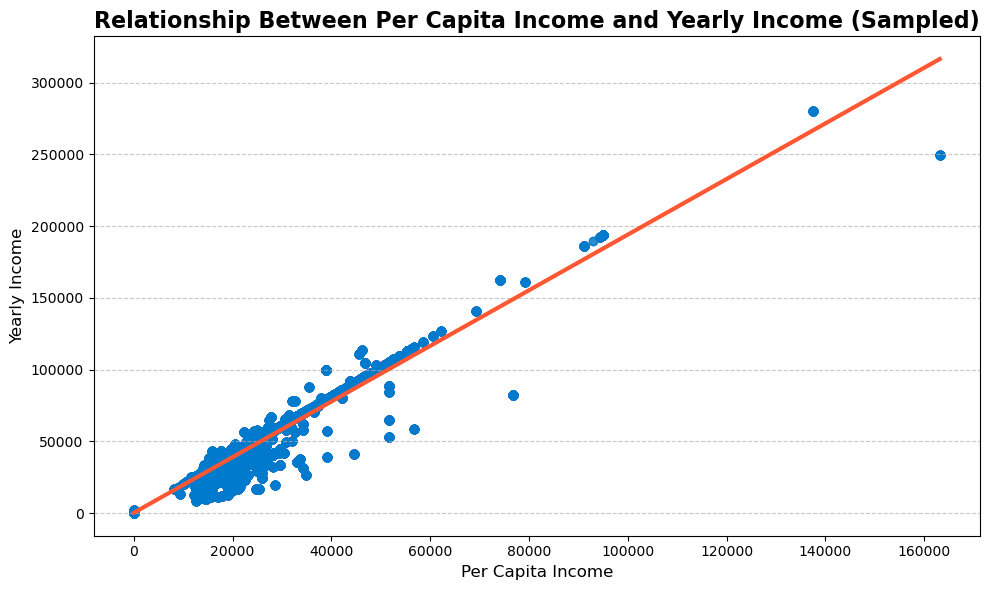

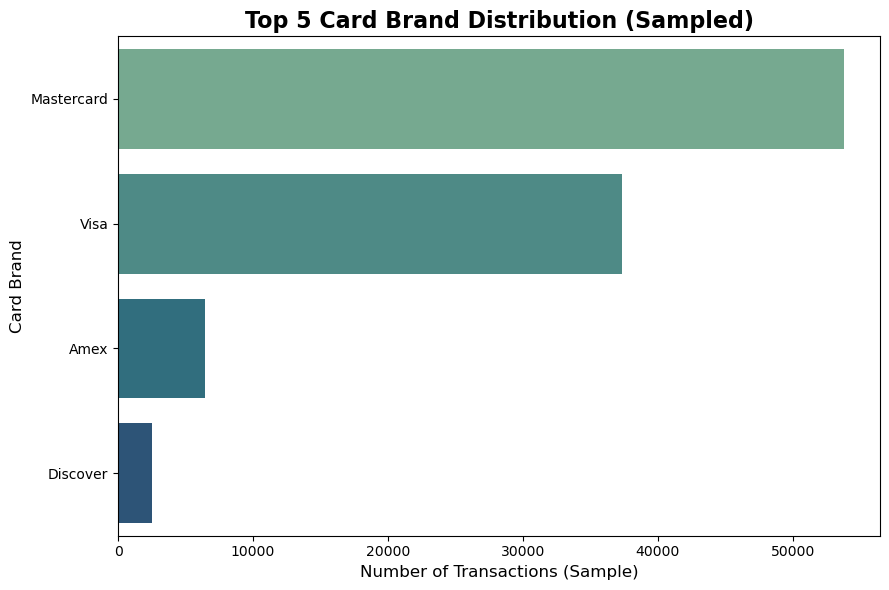

In [20]:
# جلب عينة عشوائية صغيرة للرسم
# جلب عينة عشوائية صغيرة للرسم
df_sample = create_random_sample(OUTPUT_FILE, sample_size=100000)

if not df_sample.empty:
    
    # 🚨🚨 الحل النهائي لـ UFuncTypeError 🚨🚨
    # تنظيف 'per_capita_income' من أي رموز وتحويله إلى رقمي
    df_sample['per_capita_income'] = (
        df_sample['per_capita_income']
        .astype(str)
        .str.replace(r'[$,]', '', regex=True) # إزالة رموز العملة والفواصل
        .astype(float)
    )
    # ----------------------------------------
    
    # 1. الرسم البياني لعلاقة الدخل للفرد والدخل السنوي (RegPlot)
    plt.figure(figsize=(10, 6))
    
    # ... (باقي كود sns.regplot و sns.countplot) ...
    # تحديد الاسم الصحيح للعمود
    # بما أننا قمنا بتنظيفها مسبقاً، يفترض أن يكون الاسم 'per_capita_income'
    # إذا ظهر اسم مختلف في الطباعة أعلاه، سنستخدمه
    
    # 1. الرسم البياني لعلاقة الدخل للفرد والدخل السنوي (RegPlot)
    plt.figure(figsize=(10, 6))

    # نستخدم الاسم النظيف الذي يفترض أن يكون موجوداً
    sns.regplot(
        x='per_capita_income', 
        y='yearly_income', 
        data=df_sample, 
        scatter_kws={'alpha': 0.3, 'color': '#007ACC'}, 
        line_kws={'color': '#FF5733', 'linewidth': 3}, 
        ci=None
    )

    plt.title("Relationship Between Per Capita Income and Yearly Income (Sampled)", fontsize=16, fontweight='bold')
    plt.xlabel("Per Capita Income", fontsize=12)
    plt.ylabel("Yearly Income", fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    # 2. رسم توزيع العلامات التجارية للبطاقات (CountPlot)
    plt.figure(figsize=(9, 6))
    sns.countplot(y='card_brand', data=df_sample, 
                  order=df_sample['card_brand'].value_counts().index[:5], 
                  palette='crest')
    
    plt.title('Top 5 Card Brand Distribution (Sampled)', fontsize=16, fontweight='bold')
    plt.xlabel('Number of Transactions (Sample)', fontsize=12)
    plt.ylabel('Card Brand', fontsize=12)
    plt.tight_layout()
    plt.show()

In [23]:
import os

# متغير عالمي يحمل اسم الملف الذي تم حفظه أثناء مرحلة الـ Chunking
OUTPUT_FILE = 'fully_joined_transactions_data.csv' 
NEW_FILE_NAME = "new_transactions_data.csv"

# التحقق من وجود الملف الأصلي وإعادة تسميته
if os.path.exists(OUTPUT_FILE):
    os.rename(OUTPUT_FILE, NEW_FILE_NAME)
    print(f"✅ تم إعاد تسمية الملف بنجاح من {OUTPUT_FILE} إلى {NEW_FILE_NAME}.")
else:
    print(f"❌ الملف الأصلي ({OUTPUT_FILE}) غير موجود. تأكد من تشغيل مرحلة التحميل أولاً.")

✅ تم إعادة تسمية الملف بنجاح من fully_joined_transactions_data.csv إلى new_transactions_data.csv.
